## residuals_mhalo
- 1) this script computes the expected $\lambda_R$ as a function of $M_{halo}$ for the total population, before finding the top & bottom percentiles of $M_{stel} / M_{halo}$ (in bins of $M_{halo}$) residuals (w.r.t the total population).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init
import catalog_process
import catalog_plot
import copy

import imp 
imp.reload(catalog)
imp.reload(catalog_plot)
imp.reload(catalog_process)

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [3]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/residuals/'

# initiating catalog class objects.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)
# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total.remove_satellites(group_cat='lim') 

# creating copies of these objects and cutting on morphology.
ltgs = copy.deepcopy(total) 
ltgs.select_morphology('ltg')

etgs = copy.deepcopy(total) 
etgs.select_morphology('etg')

unclassified = copy.deepcopy(total)
unclassified.select_morphology('unclassified')

/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/catalog_init.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['stellar_to_halo_ratio'] = np.log10(tab['nsa_elpetro_mass']) -  tab['log_halo_mass']


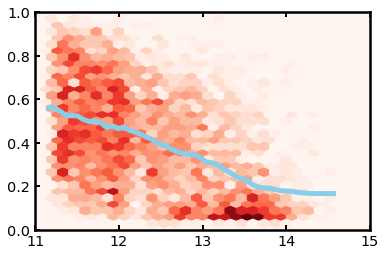

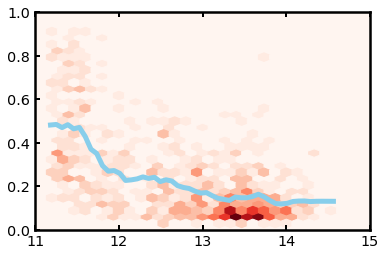

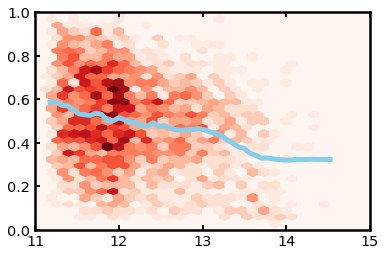

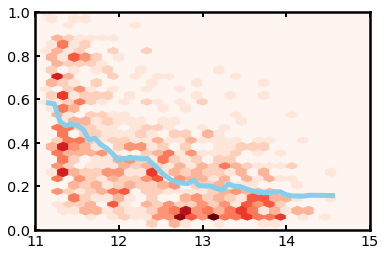

In [4]:
# finding rolling mean for populations.
fraction = 0.1 # rolling mean contains 5% of total points.

p_total = total.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, plot_x_extent=[11, 15], n_neighbours=int(fraction*total.df.shape[0]))
p_etgs = etgs.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, plot_x_extent=[11, 15], n_neighbours=int(fraction*etgs.df.shape[0]))
p_ltgs = ltgs.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, plot_x_extent=[11, 15], n_neighbours=int(fraction*ltgs.df.shape[0]))
p_unclassified = unclassified.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, plot_x_extent=[11, 15], n_neighbours=int(fraction*unclassified.df.shape[0]))


### computing residuals splitting on quartiles of $M_{stel} / M_{halo}$

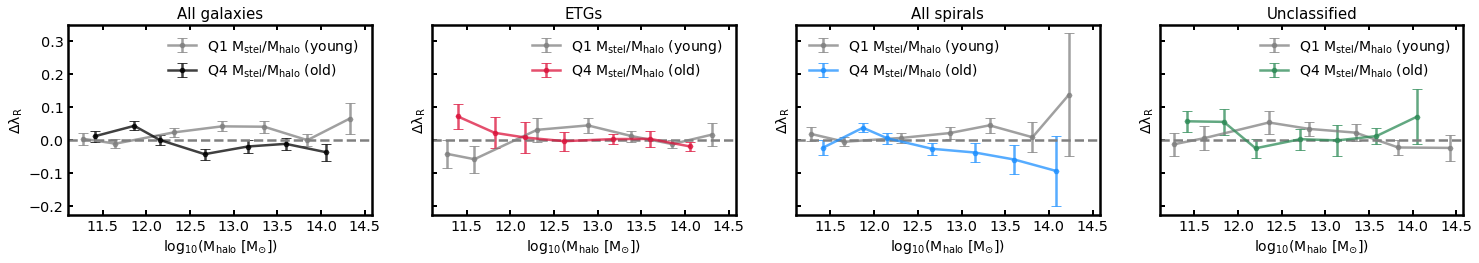

In [17]:
x_bins = np.array([11.5, 12, 12.5, 13, 13.5, 14])

z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Q1 $\mathrm{M_{stel}/M_{halo}\; (young)}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Q4 $\mathrm{M_{stel}/M_{halo} \; (old)}$']

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')
total.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_total, ax[0], colors=['grey', 'dimgray', 'rosybrown', 'k'], extrema=True)
etgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_etgs, ax[1], colors=['grey', 'k', 'orange', 'crimson'], extrema=True)
ltgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_ltgs, ax[2], colors=['grey', 'k', 'lightblue', 'dodgerblue'], extrema=True)
unclassified.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_unclassified, ax[3], colors=['grey', 'k', 'green', 'seagreen'], extrema=True)

titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.axhline(0, color='grey', linestyle='dashed')
    axis.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)
    axis.legend(frameon=False, fontsize=14)

plt.savefig(outpath+'lambdaR_mhalo-mstel_mhalo_quartile_split.pdf', format='pdf', bbox_inches='tight')


### computing residuals splitting on quartiles of $M_{stel}$

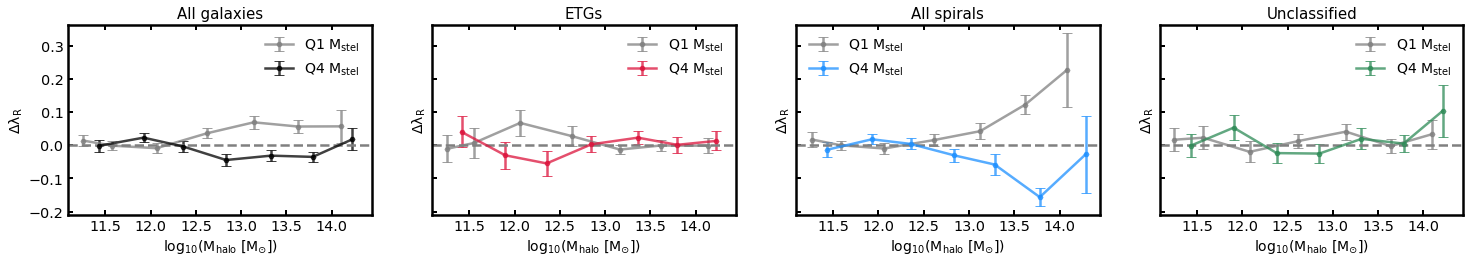

In [21]:
x_bins = np.array([11.5, 12, 12.5, 13, 13.5, 14])

z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Q1 $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}}$', 'Q3 $\mathrm{M_{stel}}$', 'Q4 $\mathrm{M_{stel}}$']

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')
total.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_total, ax[0], colors=['grey', 'dimgray', 'rosybrown', 'k'], extrema=True)
etgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_etgs, ax[1], colors=['grey', 'k', 'orange', 'crimson'], extrema=True)
ltgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_ltgs, ax[2], colors=['grey', 'k', 'lightblue', 'dodgerblue'], extrema=True)
unclassified.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_unclassified, ax[3], colors=['grey', 'k', 'green', 'seagreen'], extrema=True)

titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.axhline(0, color='grey', linestyle='dashed')
    axis.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)
    axis.legend(frameon=False, fontsize=14)

plt.savefig(outpath+'lambdaR_mhalo-mstel_quartile_split.pdf', format='pdf', bbox_inches='tight')


### computing residuals splitting on quartiles of distance to filament.

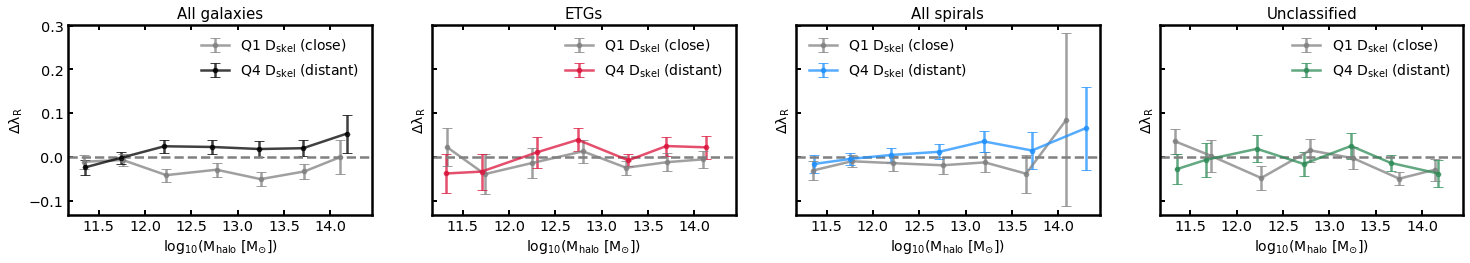

In [5]:
# first of all being agnostic to nodes.

x_bins = np.array([11.5, 12, 12.5, 13, 13.5, 14])
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Q1 $\mathrm{D_{skel}\; (close)}$', 'Q2 $\mathrm{D_{skel}}$', 'Q3 $\mathrm{D_{skel}}$', 'Q4 $\mathrm{D_{skel} \; (distant)}$']

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')
total.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_total, ax[0], colors=['grey', 'grey', 'k', 'k'], extrema=True)
etgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_etgs, ax[1], colors=['grey', 'grey', 'salmon', 'crimson'], extrema=True)
ltgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_ltgs, ax[2], colors=['grey', 'grey', 'lightblue', 'dodgerblue'], extrema=True)
unclassified.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_unclassified, ax[3], colors=['grey', 'green', 'lightgreen', 'seagreen'], extrema=True)

titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.axhline(0, color='grey', linestyle='dashed')
    axis.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)
    axis.legend(frameon=False, fontsize=14)

#plt.savefig(outpath+'lambdaR_mhalo-dskel_quartile_split.pdf', format='pdf', bbox_inches='tight')

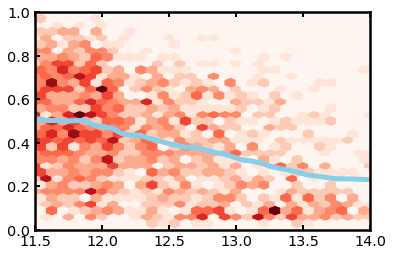

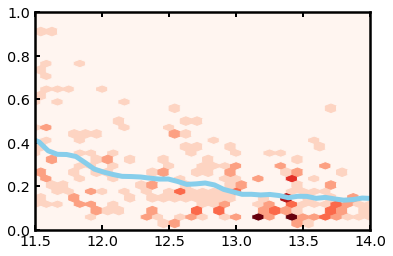

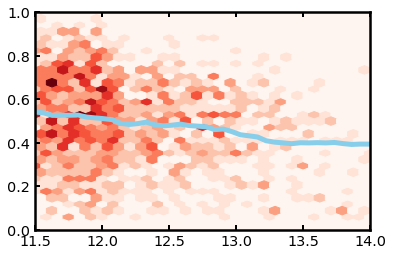

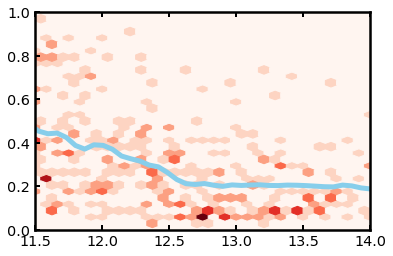

In [6]:
# removing all galaxies close to nodes. 

total_no_node = copy.deepcopy(total) 
total_no_node.select_cw_enviro(feature='no_node', node_dist=1)

etgs_no_node = copy.deepcopy(etgs) 
etgs_no_node.select_cw_enviro(feature='no_node', node_dist=1)

ltgs_no_node = copy.deepcopy(ltgs) 
ltgs_no_node.select_cw_enviro(feature='no_node', node_dist=1)

unclassified_no_node = copy.deepcopy(unclassified) 
unclassified_no_node.select_cw_enviro(feature='no_node', node_dist=1)

# recomputing rolling mean for populations.
fraction = 0.1 # rolling mean contains 5% of total points.

p_total_no_node = total_no_node.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, n_neighbours=int(fraction*total.df.shape[0]))
p_etgs_no_node = etgs_no_node.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, n_neighbours=int(fraction*etgs.df.shape[0]))
p_ltgs_no_node = ltgs_no_node.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, n_neighbours=int(fraction*ltgs.df.shape[0]))
p_unclassified_no_node = unclassified_no_node.compute_expected_y("log_halo_mass", "Lambda_Re", method="running_mean", return_plot=True, n_neighbours=int(fraction*unclassified.df.shape[0]))


### computing residuals splitting on quartiles of distance to filament, having removed those close to nodes.

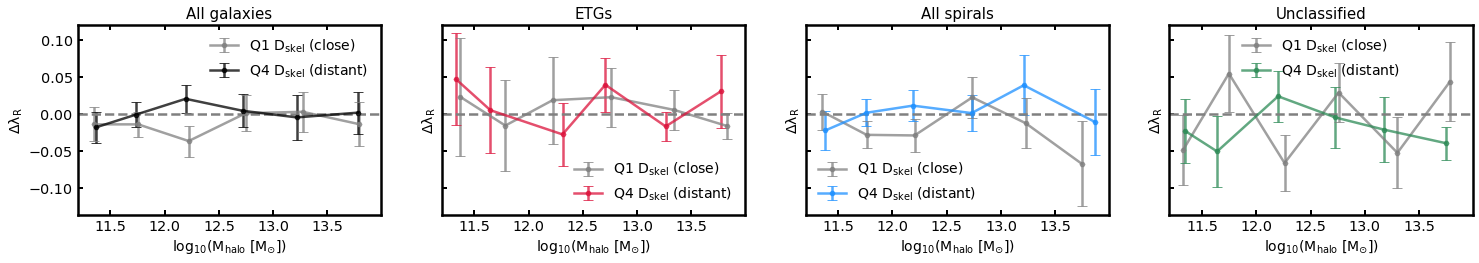

In [7]:
x_bins = np.array([11.5, 12, 12.5, 13, 13.5])
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Q1 $\mathrm{D_{skel}\; (close)}$', 'Q2 $\mathrm{D_{skel}}$', 'Q3 $\mathrm{D_{skel}}$', 'Q4 $\mathrm{D_{skel} \; (distant)}$']

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')
total_no_node.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_total_no_node, ax[0], colors=['grey', 'grey', 'k', 'k'], extrema=True)
etgs_no_node.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_etgs_no_node, ax[1], colors=['grey', 'grey', 'salmon', 'crimson'], extrema=True)
ltgs_no_node.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_ltgs_no_node, ax[2], colors=['grey', 'grey', 'lightblue', 'dodgerblue'], extrema=True)
unclassified_no_node.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, z_percentile_labels, p_unclassified_no_node, ax[3], colors=['grey', 'green', 'lightgreen', 'seagreen'], extrema=True)
titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.axhline(0, color='grey', linestyle='dashed')
    axis.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)
    axis.legend(frameon=False, fontsize=14)

plt.savefig(outpath+'lambdaR_mhalo-dskel_quartile_split_no_nodes_1mpc.pdf', format='pdf', bbox_inches='tight')
